In [21]:
import pandas as pd

df = pd.read_excel("Indices weed-crop.xlsx", sheet_name="Poveda")


In [7]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  379 non-null    object 
 1   RARSa    379 non-null    float64
 2   RARSb    379 non-null    float64
 3   NDVI705  379 non-null    float64
 4   PSSRa    379 non-null    float64
 5   PSSRb    379 non-null    float64
 6   PSNDa    379 non-null    float64
 7   PSNDb    379 non-null    float64
 8   YI       379 non-null    float64
 9   mSR      379 non-null    float64
 10  mNDI     379 non-null    float64
 11  DD       379 non-null    float64
 12  RES      379 non-null    float64
 13  RARSc    379 non-null    float64
 14  SIPI     379 non-null    float64
 15  PSSRc    379 non-null    float64
 16  PRI      379 non-null    float64
 17  CARI     379 non-null    float64
 18  MSI      379 non-null    float64
 19  WI       379 non-null    float64
 20  TM5TM7   379 non-null    float64
 21  NDVIa    379 non

,RARSa,RARSb,NDVI705,PSSRa,PSSRb,PSNDa,PSNDb,YI,mSR,mNDI,...,TBRIa,TBRIb,NDWIa,NDWIb,NDWIc,WABIa,WABIb,WABIc,NDlma,NDMI
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,...,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.431506,0.055327,0.387010,7.300467,6.347584,0.751096,0.718598,-0.003455,1.410843,0.501092,...,0.969996,0.942992,0.555468,0.234785,0.576278,-0.018432,-0.007868,-0.091314,0.136865,0.001809
std,0.077104,0.010965,0.068598,1.517251,1.350003,0.044318,0.051200,0.002185,0.283460,0.081317,...,0.009235,0.018919,0.091308,0.067607,0.089401,0.107988,0.103873,0.106388,0.033744,0.003777
min,0.284327,0.029541,0.151134,4.462164,3.649889,0.633845,0.569882,-0.008149,0.763785,0.208413,...,0.932794,0.879784,0.354770,0.125890,0.390141,-0.329496,-0.306530,-0.394266,0.081401,-0.007989
25%,0.377311,0.048277,0.348724,5.986514,5.210576,0.713734,0.677969,-0.004991,1.185429,0.451250,...,0.965045,0.929149,0.481594,0.178597,0.499098,-0.090624,-0.075695,-0.164841,0.108598,-0.000777
50%,0.424744,0.054555,0.389580,7.160828,6.267649,0.754927,0.724808,-0.003738,1.453088,0.492345,...,0.971034,0.947830,0.548036,0.219042,0.572254,-0.005873,0.006079,-0.073102,0.131261,0.002350
75%,0.472667,0.061282,0.431031,8.363482,7.322649,0.786404,0.759691,-0.002300,1.595149,0.565159,...,0.975244,0.958268,0.635469,0.284664,0.652139,0.057505,0.064104,-0.016604,0.160109,0.004222
max,0.632927,0.103786,0.568353,10.878288,9.811643,0.831626,0.815014,0.006127,2.199732,0.729374,...,0.992297,0.972626,0.751454,0.407453,0.787505,0.269070,0.263129,0.191747,0.234800,0.010378


Free attempt - 5 indices - straightforward

Accuracy: 0.868421052631579


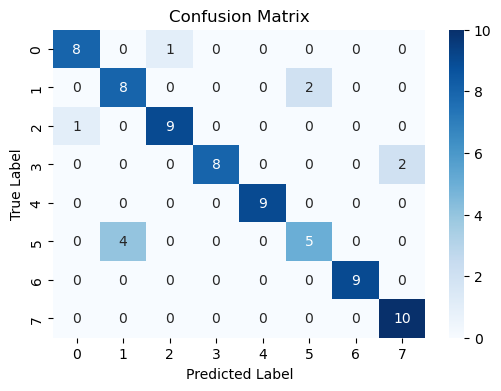

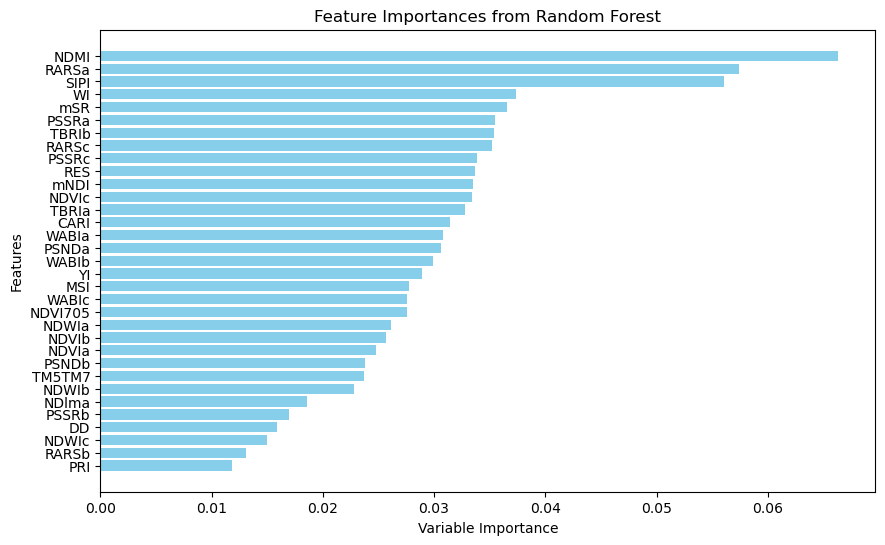

,ASGPR,BROSS,Camelina,Canola,DIPMU,LOLMU,PAPRH,Salvia
ASGPR,88.888889,0.000000,11.111111,0.0,0.0,0.000000,0.0,0.0
BROSS,0.000000,80.000000,0.000000,0.0,0.0,20.000000,0.0,0.0
Camelina,10.000000,0.000000,90.000000,0.0,0.0,0.000000,0.0,0.0
Canola,0.000000,0.000000,0.000000,80.0,0.0,0.000000,0.0,20.0
DIPMU,0.000000,0.000000,0.000000,0.0,100.0,0.000000,0.0,0.0
LOLMU,0.000000,44.444444,0.000000,0.0,0.0,55.555556,0.0,0.0
PAPRH,0.000000,0.000000,0.000000,0.0,0.0,0.000000,100.0,0.0
Salvia,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,100.0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

In [27]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------- tiny helpers ----------
class ConstantPredictor:
    """Always predicts one label; used when a branch has a single class."""
    def __init__(self, label):
        self.label = label
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.array([self.label] * len(X))

def safe_split(X, y, test_size=0.2, random_state=42):
    """Stratify only if >1 class, otherwise do a plain split."""
    y = pd.Series(y)
    if y.nunique() > 1:
        return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    else:
        return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=None)

# ---------- your taxonomy lists (Barley already removed upstream) ----------
monocot_species = ["BROSS","LOLMU"]
dicot_species   = ["PAPRH","DIPMU","ASPGR","Salvia","Canola","Camelina"]

weed_species    = ["PAPRH","BROSS","LOLMU","DIPMU","ASPGR"]
crop_species    = ["Salvia","Canola","Camelina"]

# optional: third-level groups if you care to keep them around (not strictly used below)
monocot_weed_species = ["BROSS","LOLMU"]
dicot_weed_species   = ["PAPRH","DIPMU","ASPGR"]
dicot_crop_species   = ["Salvia","Canola","Camelina"]

# ---------- assume df (with 'species' + features) and X (feature matrix) already exist ----------
# If X isn't defined, uncomment this to auto-select features:
# non_features = {"species", "category1", "category2"}
# feature_cols = [c for c in df.columns if c not in non_features]
# X = df[feature_cols].copy()

# 1) Categories
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# 2) Level 1 split and model (monocot vs dicot)
y_cat1 = df["category1"]
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1
)
train_idx = X_train_cat1.index
test_idx  = X_test_cat1.index

clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1 (used only for quick inspection if needed)
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

# 3) Level 2 models (weed vs crop) within each cat1, with safe single-class handling

# Monocot branch
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df.loc[monocot_mask, 'category2']

if y_monocot.nunique() > 1:
    X_train_mono, X_val_mono, y_train_mono, y_val_mono = safe_split(X_monocot, y_monocot, test_size=0.2, random_state=42)
    clf_cat2_monocot = RandomForestClassifier(random_state=42).fit(X_train_mono, y_train_mono)
else:
    only_label = y_monocot.iloc[0] if len(y_monocot) else 'weed'
    clf_cat2_monocot = ConstantPredictor(only_label).fit(None, None)

# Dicot branch
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df.loc[dicot_mask, 'category2']

if y_dicot.nunique() > 1:
    X_train_di, X_val_di, y_train_di, y_val_di = safe_split(X_dicot, y_dicot, test_size=0.2, random_state=42)
    clf_cat2_dicot = RandomForestClassifier(random_state=42).fit(X_train_di, y_train_di)
else:
    only_label = y_dicot.iloc[0] if len(y_dicot) else 'weed'
    clf_cat2_dicot = ConstantPredictor(only_label).fit(None, None)

# 4) Level 3 species models per (cat1, cat2), trained ONLY on Level-1 training rows (no leakage)

# Monocot-Weed
mono_weed_mask_train = (df['category1']=='monocot') & (df['category2']=='weed') & df.index.isin(train_idx)
X_mono_weed = X[mono_weed_mask_train]
y_mono_weed = df.loc[mono_weed_mask_train, 'species']
clf_mono_weed = None
if len(X_mono_weed):
    if pd.Series(y_mono_weed).nunique() > 1:
        clf_mono_weed = RandomForestClassifier(random_state=42).fit(X_mono_weed, y_mono_weed)
    else:
        clf_mono_weed = ConstantPredictor(y_mono_weed.iloc[0]).fit(None, None)

# Monocot-Crop (likely empty after removing Barley)
mono_crop_mask_train = (df['category1']=='monocot') & (df['category2']=='crop') & df.index.isin(train_idx)
X_mono_crop = X[mono_crop_mask_train]
y_mono_crop = df.loc[mono_crop_mask_train, 'species']
clf_mono_crop = None
if len(X_mono_crop):
    if pd.Series(y_mono_crop).nunique() > 1:
        clf_mono_crop = RandomForestClassifier(random_state=42).fit(X_mono_crop, y_mono_crop)
    else:
        clf_mono_crop = ConstantPredictor(y_mono_crop.iloc[0]).fit(None, None)

# Dicot-Weed
dicot_weed_mask_train = (df['category1']=='dicot') & (df['category2']=='weed') & df.index.isin(train_idx)
X_dicot_weed = X[dicot_weed_mask_train]
y_dicot_weed = df.loc[dicot_weed_mask_train, 'species']
clf_dicot_weed = None
if len(X_dicot_weed):
    if pd.Series(y_dicot_weed).nunique() > 1:
        clf_dicot_weed = RandomForestClassifier(random_state=42).fit(X_dicot_weed, y_dicot_weed)
    else:
        clf_dicot_weed = ConstantPredictor(y_dicot_weed.iloc[0]).fit(None, None)

# Dicot-Crop
dicot_crop_mask_train = (df['category1']=='dicot') & (df['category2']=='crop') & df.index.isin(train_idx)
X_dicot_crop = X[dicot_crop_mask_train]
y_dicot_crop = df.loc[dicot_crop_mask_train, 'species']
clf_dicot_crop = None
if len(X_dicot_crop):
    if pd.Series(y_dicot_crop).nunique() > 1:
        clf_dicot_crop = RandomForestClassifier(random_state=42).fit(X_dicot_crop, y_dicot_crop)
    else:
        clf_dicot_crop = ConstantPredictor(y_dicot_crop.iloc[0]).fit(None, None)

# 5) Predict species for the Level-1 test set via the router with fallbacks
final_species_preds = []

for idx in X_test_cat1.index:
    x_row = X_test_cat1.loc[[idx]]

    # Level 1
    cat1_pred = clf_cat1.predict(x_row)[0]

    if cat1_pred == 'monocot':
        # Level 2 (monocot)
        cat2_pred = clf_cat2_monocot.predict(x_row)[0]
        if cat2_pred == 'weed' and clf_mono_weed is not None:
            sp_pred = clf_mono_weed.predict(x_row)[0]
        elif cat2_pred == 'crop' and clf_mono_crop is not None:
            sp_pred = clf_mono_crop.predict(x_row)[0]
        else:
            # fallback to whichever monocot species model exists
            if clf_mono_weed is not None:
                sp_pred = clf_mono_weed.predict(x_row)[0]
            elif clf_mono_crop is not None:
                sp_pred = clf_mono_crop.predict(x_row)[0]
            else:
                raise RuntimeError("No monocot species model available.")
    else:
        # Level 2 (dicot)
        cat2_pred = clf_cat2_dicot.predict(x_row)[0]
        if cat2_pred == 'weed' and clf_dicot_weed is not None:
            sp_pred = clf_dicot_weed.predict(x_row)[0]
        elif cat2_pred == 'crop' and clf_dicot_crop is not None:
            sp_pred = clf_dicot_crop.predict(x_row)[0]
        else:
            # fallback to whichever dicot species model exists
            if clf_dicot_weed is not None:
                sp_pred = clf_dicot_weed.predict(x_row)[0]
            elif clf_dicot_crop is not None:
                sp_pred = clf_dicot_crop.predict(x_row)[0]
            else:
                raise RuntimeError("No dicot species model available.")

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# 6) Metrics
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

labels_ = np.unique(y_test_species)
cm = confusion_matrix(y_test_species, final_species_preds, labels=labels_)
cm_percentage = cm.astype(float) / cm.sum(axis=1, keepdims=True) * 100
cm_df = pd.DataFrame(cm_percentage, index=labels_, columns=labels_)

print("\nConfusion matrix (%):")
print(cm_df.round(2))

print("\nClassification report:")
print(classification_report(y_test_species, final_species_preds))


Final Species-Level Accuracy: 0.8421052631578947

Confusion matrix (%):
          ASGPR  BROSS  Camelina  Canola  DIPMU  LOLMU  PAPRH  Salvia
ASGPR     92.86   0.00      7.14    0.00    0.0   0.00    0.0    0.00
BROSS     10.00  50.00      0.00    0.00   10.0  30.00    0.0    0.00
Camelina  14.29   0.00     85.71    0.00    0.0   0.00    0.0    0.00
Canola     0.00   0.00      0.00   88.89    0.0   0.00    0.0   11.11
DIPMU      0.00   0.00      0.00    0.00  100.0   0.00    0.0    0.00
LOLMU      0.00  11.11      0.00    0.00    0.0  88.89    0.0    0.00
PAPRH      0.00   0.00      0.00    0.00    0.0   0.00  100.0    0.00
Salvia    14.29   0.00      0.00   28.57    0.0   0.00    0.0   57.14

Classification report:
              precision    recall  f1-score   support

       ASGPR       0.81      0.93      0.87        14
       BROSS       0.83      0.50      0.62        10
    Camelina       0.86      0.86      0.86         7
      Canola       0.80      0.89      0.84         9
   

Accuracy: 0.6447368421052632


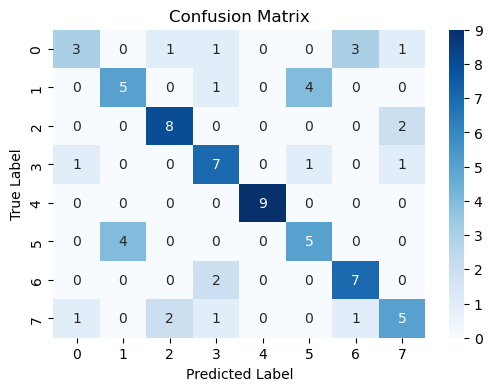

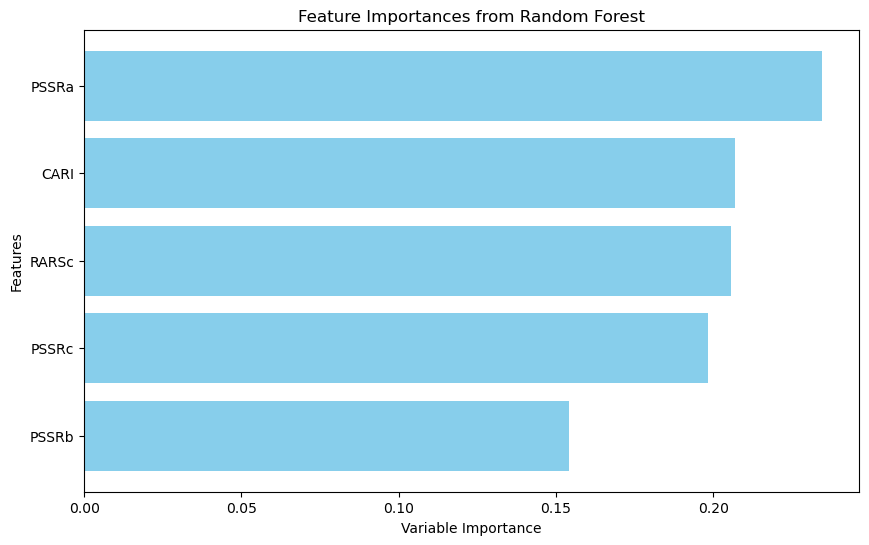

,ASGPR,BROSS,Camelina,Canola,DIPMU,LOLMU,PAPRH,Salvia
ASGPR,33.333333,0.000000,11.111111,11.111111,0.0,0.000000,33.333333,11.111111
BROSS,0.000000,50.000000,0.000000,10.000000,0.0,40.000000,0.000000,0.000000
Camelina,0.000000,0.000000,80.000000,0.000000,0.0,0.000000,0.000000,20.000000
Canola,10.000000,0.000000,0.000000,70.000000,0.0,10.000000,0.000000,10.000000
DIPMU,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,0.000000
LOLMU,0.000000,44.444444,0.000000,0.000000,0.0,55.555556,0.000000,0.000000
PAPRH,0.000000,0.000000,0.000000,22.222222,0.0,0.000000,77.777778,0.000000
Salvia,10.000000,0.000000,20.000000,10.000000,0.0,0.000000,10.000000,50.000000


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

In [31]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------- tiny helpers ----------
class ConstantPredictor:
    """Predicts a single label; used when a branch has only one class or no RF is possible."""
    def __init__(self, label): self.label = label
    def fit(self, X=None, y=None): return self
    def predict(self, X): return np.array([self.label] * len(X))

def safe_split(X, y, test_size=0.2, random_state=42):
    """Stratify only if >1 class."""
    y = pd.Series(y)
    if y.nunique() > 1:
        return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    else:
        return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=None)

# ---------- your taxonomy lists (Barley already gone upstream) ----------
monocot_species = ["BROSS","LOLMU"]
dicot_species   = ["PAPRH","DIPMU","ASPGR","Salvia","Canola","Camelina"]

weed_species    = ["PAPRH","BROSS","LOLMU","DIPMU","ASPGR"]
crop_species    = ["Salvia","Canola","Camelina"]

# ---------- categories ----------
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# ---------- FEATURES: your exact five ----------
feat_cols = ["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]
X = df[feat_cols].copy()

# ---------- Level 1: monocot vs dicot ----------
y_cat1 = df["category1"]
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1
)
train_idx = X_train_cat1.index
test_idx  = X_test_cat1.index

clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

# ---------- Level 2: weed vs crop within each cat1 (robust to single-class) ----------
# Monocot branch
mono_mask = df['category1'] == 'monocot'
X_mono = X[mono_mask]
y_mono = df.loc[mono_mask, 'category2']

if y_mono.nunique() > 1:
    X_train_mono, X_val_mono, y_train_mono, y_val_mono = safe_split(X_mono, y_mono, test_size=0.2, random_state=42)
    clf_cat2_monocot = RandomForestClassifier(random_state=42).fit(X_train_mono, y_train_mono)
else:
    only_label = y_mono.iloc[0] if len(y_mono) else 'weed'
    clf_cat2_monocot = ConstantPredictor(only_label)

# Dicot branch
di_mask = df['category1'] == 'dicot'
X_di = X[di_mask]
y_di = df.loc[di_mask, 'category2']

if y_di.nunique() > 1:
    X_train_di, X_val_di, y_train_di, y_val_di = safe_split(X_di, y_di, test_size=0.2, random_state=42)
    clf_cat2_dicot = RandomForestClassifier(random_state=42).fit(X_train_di, y_train_di)
else:
    only_label = y_di.iloc[0] if len(y_di) else 'weed'
    clf_cat2_dicot = ConstantPredictor(only_label)

# ---------- Level 3: species models per (cat1, cat2), trained ONLY on Level-1 training rows ----------
# Monocot-weed
mono_weed_mask_tr = (df['category1']=='monocot') & (df['category2']=='weed') & df.index.isin(train_idx)
X_mw = X[mono_weed_mask_tr]; y_mw = df.loc[mono_weed_mask_tr, 'species']
clf_mono_weed = None
if len(X_mw):
    clf_mono_weed = (RandomForestClassifier(random_state=42).fit(X_mw, y_mw)
                     if pd.Series(y_mw).nunique() > 1 else ConstantPredictor(y_mw.iloc[0]))

# Monocot-crop (likely empty now)
mono_crop_mask_tr = (df['category1']=='monocot') & (df['category2']=='crop') & df.index.isin(train_idx)
X_mc = X[mono_crop_mask_tr]; y_mc = df.loc[mono_crop_mask_tr, 'species']
clf_mono_crop = None
if len(X_mc):
    clf_mono_crop = (RandomForestClassifier(random_state=42).fit(X_mc, y_mc)
                     if pd.Series(y_mc).nunique() > 1 else ConstantPredictor(y_mc.iloc[0]))

# Dicot-weed
di_weed_mask_tr = (df['category1']=='dicot') & (df['category2']=='weed') & df.index.isin(train_idx)
X_dw = X[di_weed_mask_tr]; y_dw = df.loc[di_weed_mask_tr, 'species']
clf_dicot_weed = None
if len(X_dw):
    clf_dicot_weed = (RandomForestClassifier(random_state=42).fit(X_dw, y_dw)
                      if pd.Series(y_dw).nunique() > 1 else ConstantPredictor(y_dw.iloc[0]))

# Dicot-crop
di_crop_mask_tr = (df['category1']=='dicot') & (df['category2']=='crop') & df.index.isin(train_idx)
X_dc = X[di_crop_mask_tr]; y_dc = df.loc[di_crop_mask_tr, 'species']
clf_dicot_crop = None
if len(X_dc):
    clf_dicot_crop = (RandomForestClassifier(random_state=42).fit(X_dc, y_dc)
                      if pd.Series(y_dc).nunique() > 1 else ConstantPredictor(y_dc.iloc[0]))

# ---------- Predict species for the Level-1 test set via router with fallbacks ----------
final_species_preds = []

for idx in X_test_cat1.index:
    x_row = X_test_cat1.loc[[idx]]

    # Level 1
    cat1_pred = clf_cat1.predict(x_row)[0]

    if cat1_pred == 'monocot':
        # Level 2 (monocot)
        cat2_pred = clf_cat2_monocot.predict(x_row)[0]
        if cat2_pred == 'weed' and clf_mono_weed is not None:
            sp_pred = clf_mono_weed.predict(x_row)[0]
        elif cat2_pred == 'crop' and clf_mono_crop is not None:
            sp_pred = clf_mono_crop.predict(x_row)[0]
        else:
            # fallback to whichever monocot species model exists
            if clf_mono_weed is not None:
                sp_pred = clf_mono_weed.predict(x_row)[0]
            elif clf_mono_crop is not None:
                sp_pred = clf_mono_crop.predict(x_row)[0]
            else:
                raise RuntimeError("No monocot species model available.")
    else:
        # Level 2 (dicot)
        cat2_pred = clf_cat2_dicot.predict(x_row)[0]
        if cat2_pred == 'weed' and clf_dicot_weed is not None:
            sp_pred = clf_dicot_weed.predict(x_row)[0]
        elif cat2_pred == 'crop' and clf_dicot_crop is not None:
            sp_pred = clf_dicot_crop.predict(x_row)[0]
        else:
            # fallback to whichever dicot species model exists
            if clf_dicot_weed is not None:
                sp_pred = clf_dicot_weed.predict(x_row)[0]
            elif clf_dicot_crop is not None:
                sp_pred = clf_dicot_crop.predict(x_row)[0]
            else:
                raise RuntimeError("No dicot species model available.")

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# ---------- Metrics ----------
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

labels_ = np.unique(y_test_species)
cm = confusion_matrix(y_test_species, final_species_preds, labels=labels_)
cm_percentage = cm.astype(float) / cm.sum(axis=1, keepdims=True) * 100
cm_df = pd.DataFrame(cm_percentage, index=labels_, columns=labels_)
print("\nConfusion matrix (%):")
print(cm_df.round(2))

print("\nClassification report:")
print(classification_report(y_test_species, final_species_preds))


Final Species-Level Accuracy: 0.6842105263157895

Confusion matrix (%):
          ASGPR  BROSS  Camelina  Canola   DIPMU  LOLMU   PAPRH  Salvia
ASGPR     50.00   0.00     14.29    7.14    0.00   0.00    7.14   21.43
BROSS      0.00  30.00      0.00   20.00    0.00  50.00    0.00    0.00
Camelina  28.57   0.00     71.43    0.00    0.00   0.00    0.00    0.00
Canola    11.11   0.00      0.00   77.78    0.00   0.00    0.00   11.11
DIPMU      0.00   0.00      0.00    0.00  100.00   0.00    0.00    0.00
LOLMU      0.00  11.11      0.00    0.00   11.11  77.78    0.00    0.00
PAPRH      0.00   0.00      0.00    0.00    0.00   0.00  100.00    0.00
Salvia    28.57   0.00      0.00   14.29    0.00  14.29    0.00   42.86

Classification report:
              precision    recall  f1-score   support

       ASGPR       0.58      0.50      0.54        14
       BROSS       0.75      0.30      0.43        10
    Camelina       0.71      0.71      0.71         7
      Canola       0.64      0.78      

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","BROSS","LOLMU"]  # example species
dicot_species   = ["PAPRH","DIPMU","ASPGR","Salvia","Canola","Camelina"]
weed_species    = ["PAPRH","BROSS","LOLMU","DIPMU","ASPGR"]  # example of some species labeled as weeds
crop_species    = ["Barley","Salvia","Canola","Camelina"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["BROSS","LOLMU"]
monocot_crop_species = [ "Barley"]
dicot_weed_species   = ["PAPRH","DIPMU","ASPGR"]
dicot_crop_species = ["Salvia","Canola","Camelina"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y_cat1 = df["category1"]  # Level 1 target

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# Now we have predictions for category1 and category2. Next: species level.

# For the third level, we train separate models for each final group:
# Monocot-Weed, Monocot-Crop, Dicot-Weed, Dicot-Crop.

# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
X_dicot_crop = X[dicot_crop_mask]
y_dicot_crop = df['species'][dicot_crop_mask]

clf_dicot_crop = RandomForestClassifier(random_state=42)
clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)

# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df



Final Species-Level Accuracy: 0.9302325581395349


,ASGPR,BROSS,Barley,Camelina,Canola,DIPMU,LOLMU,PAPRH,Salvia
ASGPR,92.857143,0.0,0.000000,0.0,0.000000,0.000000,0.0,7.142857,0.000000
BROSS,0.000000,100.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Barley,0.000000,0.0,71.428571,0.0,14.285714,7.142857,0.0,7.142857,0.000000
Camelina,0.000000,0.0,0.000000,100.0,0.000000,0.000000,0.0,0.000000,0.000000
Canola,0.000000,0.0,0.000000,0.0,100.000000,0.000000,0.0,0.000000,0.000000
DIPMU,0.000000,0.0,0.000000,0.0,0.000000,100.000000,0.0,0.000000,0.000000
LOLMU,0.000000,0.0,0.000000,0.0,0.000000,0.000000,100.0,0.000000,0.000000
PAPRH,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,100.000000,0.000000
Salvia,0.000000,0.0,14.285714,0.0,0.000000,0.000000,0.0,0.000000,85.714286


In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["BROSS","LOLMU"]  # example species
dicot_species   = ["PAPRH","DIPMU","ASPGR","Salvia","Canola","Camelina"]
weed_species    = ["PAPRH","BROSS","LOLMU","DIPMU","ASPGR"]  # example of some species labeled as weeds
crop_species    = ["Salvia","Canola","Camelina"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["BROSS","LOLMU"]
dicot_weed_species   = ["PAPRH","DIPMU","ASPGR"]
dicot_crop_species = ["Salvia","Canola","Camelina"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y_cat1 = df["category1"]  # Level 1 target

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# Now we have predictions for category1 and category2. Next: species level.

# For the third level, we train separate models for each final group:
# Monocot-Weed, Monocot-Crop, Dicot-Weed, Dicot-Crop.

# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
X_dicot_crop = X[dicot_crop_mask]
y_dicot_crop = df['species'][dicot_crop_mask]

clf_dicot_crop = RandomForestClassifier(random_state=42)
clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)

# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df



Final Species-Level Accuracy: 0.9342105263157895


,ASGPR,BROSS,Camelina,Canola,DIPMU,LOLMU,PAPRH,Salvia
ASGPR,92.857143,0.0,0.0,0.0,0.000000,0.000000,7.142857,0.000000
BROSS,0.000000,80.0,0.0,20.0,0.000000,0.000000,0.000000,0.000000
Camelina,0.000000,0.0,100.0,0.0,0.000000,0.000000,0.000000,0.000000
Canola,0.000000,0.0,0.0,100.0,0.000000,0.000000,0.000000,0.000000
DIPMU,0.000000,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000
LOLMU,0.000000,0.0,0.0,0.0,11.111111,88.888889,0.000000,0.000000
PAPRH,0.000000,0.0,0.0,0.0,0.000000,0.000000,100.000000,0.000000
Salvia,0.000000,0.0,0.0,0.0,0.000000,14.285714,0.000000,85.714286


Accuracy: 0.7674418604651163


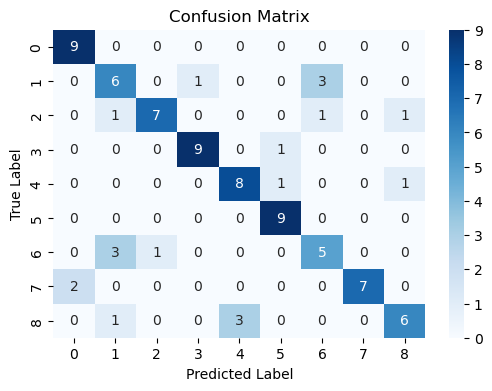

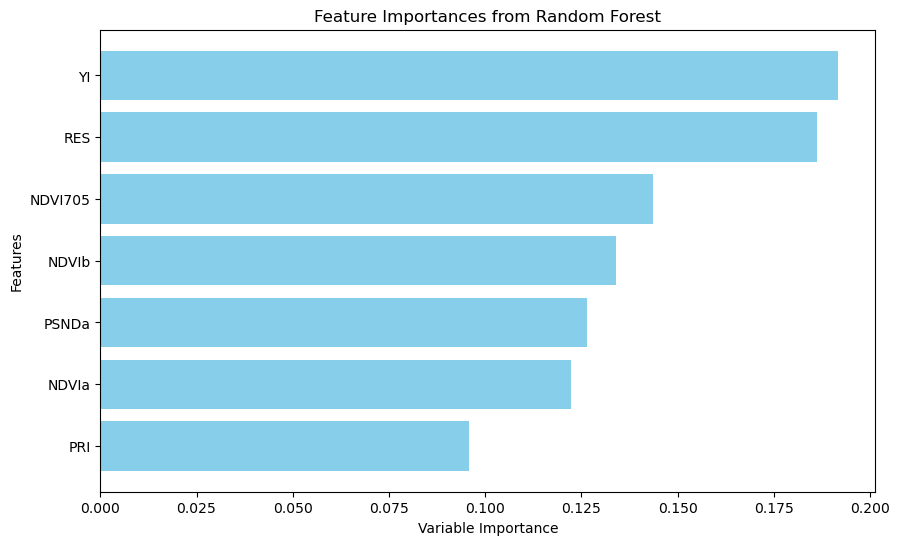

,ASGPR,BROSS,Barley,Camelina,Canola,DIPMU,LOLMU,PAPRH,Salvia
ASGPR,100.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
BROSS,0.000000,60.000000,0.000000,10.0,0.0,0.0,30.000000,0.000000,0.0
Barley,0.000000,10.000000,70.000000,0.0,0.0,0.0,10.000000,0.000000,10.0
Camelina,0.000000,0.000000,0.000000,90.0,0.0,10.0,0.000000,0.000000,0.0
Canola,0.000000,0.000000,0.000000,0.0,80.0,10.0,0.000000,0.000000,10.0
DIPMU,0.000000,0.000000,0.000000,0.0,0.0,100.0,0.000000,0.000000,0.0
LOLMU,0.000000,33.333333,11.111111,0.0,0.0,0.0,55.555556,0.000000,0.0
PAPRH,22.222222,0.000000,0.000000,0.0,0.0,0.0,0.000000,77.777778,0.0
Salvia,0.000000,10.000000,0.000000,0.0,30.0,0.0,0.000000,0.000000,60.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df[["PSNDa", "YI", "NDVI705", "RES", "PRI","NDVIa","NDVIb"]]
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","BROSS","LOLMU"]  # example species
dicot_species   = ["PAPRH","DIPMU","ASPGR","Salvia","Canola","Camelina"]
weed_species    = ["PAPRH","BROSS","LOLMU","DIPMU","ASPGR"]  # example of some species labeled as weeds
crop_species    = ["Barley","Salvia","Canola","Camelina"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["BROSS","LOLMU"]
monocot_crop_species = [ "Barley"]
dicot_weed_species   = ["PAPRH","DIPMU","ASPGR"]
dicot_crop_species = ["Salvia","Canola","Camelina"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and target
X = df[["PSNDa", "YI", "NDVI705", "RES", "PRI","NDVIa","NDVIb"]]
y_cat1 = df["category1"]  # Level 1 target

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# Now we have predictions for category1 and category2. Next: species level.

# For the third level, we train separate models for each final group:
# Monocot-Weed, Monocot-Crop, Dicot-Weed, Dicot-Crop.

# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
X_dicot_crop = X[dicot_crop_mask]
y_dicot_crop = df['species'][dicot_crop_mask]

clf_dicot_crop = RandomForestClassifier(random_state=42)
clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)

# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df



Final Species-Level Accuracy: 0.9302325581395349


,ASGPR,BROSS,Barley,Camelina,Canola,DIPMU,LOLMU,PAPRH,Salvia
ASGPR,92.857143,0.000000,0.000000,0.0,0.0,0.000000,0.0,7.142857,0.000000
BROSS,0.000000,100.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
Barley,7.142857,0.000000,78.571429,0.0,0.0,7.142857,0.0,0.000000,7.142857
Camelina,0.000000,0.000000,0.000000,100.0,0.0,0.000000,0.0,0.000000,0.000000
Canola,0.000000,0.000000,0.000000,0.0,100.0,0.000000,0.0,0.000000,0.000000
DIPMU,0.000000,9.090909,0.000000,0.0,0.0,90.909091,0.0,0.000000,0.000000
LOLMU,0.000000,0.000000,0.000000,0.0,0.0,0.000000,100.0,0.000000,0.000000
PAPRH,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,100.000000,0.000000
Salvia,0.000000,0.000000,14.285714,0.0,0.0,0.000000,0.0,0.000000,85.714286


Accuracy: 0.7790697674418605


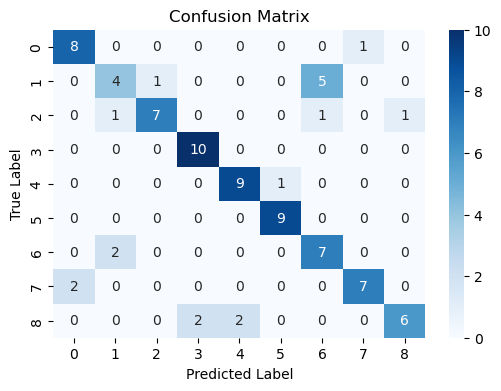

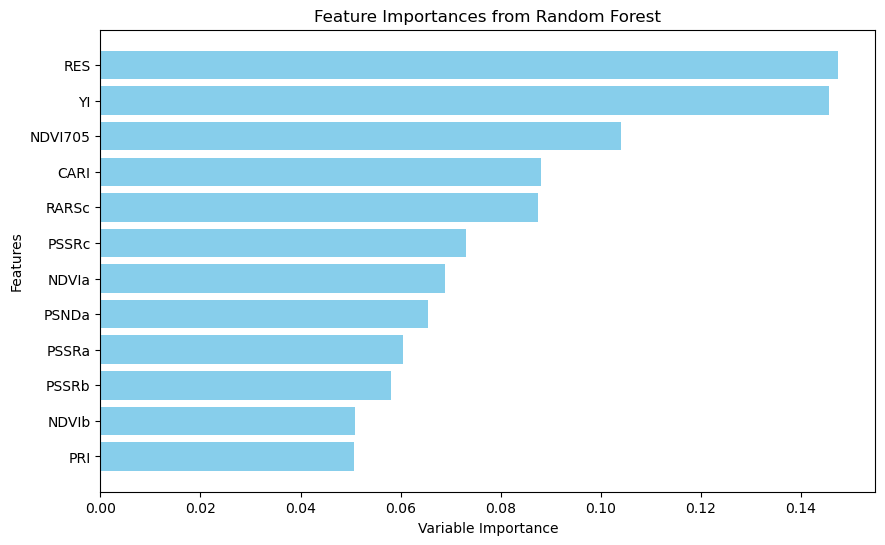

,ASGPR,BROSS,Barley,Camelina,Canola,DIPMU,LOLMU,PAPRH,Salvia
ASGPR,88.888889,0.000000,0.0,0.0,0.0,0.0,0.000000,11.111111,0.0
BROSS,0.000000,40.000000,10.0,0.0,0.0,0.0,50.000000,0.000000,0.0
Barley,0.000000,10.000000,70.0,0.0,0.0,0.0,10.000000,0.000000,10.0
Camelina,0.000000,0.000000,0.0,100.0,0.0,0.0,0.000000,0.000000,0.0
Canola,0.000000,0.000000,0.0,0.0,90.0,10.0,0.000000,0.000000,0.0
DIPMU,0.000000,0.000000,0.0,0.0,0.0,100.0,0.000000,0.000000,0.0
LOLMU,0.000000,22.222222,0.0,0.0,0.0,0.0,77.777778,0.000000,0.0
PAPRH,22.222222,0.000000,0.0,0.0,0.0,0.0,0.000000,77.777778,0.0
Salvia,0.000000,0.000000,0.0,20.0,20.0,0.0,0.000000,0.000000,60.0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI","PSNDa", "YI", "NDVI705", "RES", "PRI","NDVIa","NDVIb"]]
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","BROSS","LOLMU"]  # example species
dicot_species   = ["PAPRH","DIPMU","ASPGR","Salvia","Canola","Camelina"]
weed_species    = ["PAPRH","BROSS","LOLMU","DIPMU","ASPGR"]  # example of some species labeled as weeds
crop_species    = ["Barley","Salvia","Canola","Camelina"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["BROSS","LOLMU"]
monocot_crop_species = [ "Barley"]
dicot_weed_species   = ["PAPRH","DIPMU","ASPGR"]
dicot_crop_species = ["Salvia","Canola","Camelina"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI","PSNDa", "YI", "NDVI705", "RES", "PRI","NDVIa","NDVIb"]]
y_cat1 = df["category1"]  # Level 1 target

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# Now we have predictions for category1 and category2. Next: species level.

# For the third level, we train separate models for each final group:
# Monocot-Weed, Monocot-Crop, Dicot-Weed, Dicot-Crop.

# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
X_dicot_crop = X[dicot_crop_mask]
y_dicot_crop = df['species'][dicot_crop_mask]

clf_dicot_crop = RandomForestClassifier(random_state=42)
clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)

# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df



Final Species-Level Accuracy: 0.9418604651162791


,ASGPR,BROSS,Barley,Camelina,Canola,DIPMU,LOLMU,PAPRH,Salvia
ASGPR,85.714286,0.0,0.000000,0.000000,0.0,0.0,0.0,14.285714,0.000000
BROSS,0.000000,100.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
Barley,0.000000,0.0,85.714286,7.142857,0.0,0.0,0.0,0.000000,7.142857
Camelina,0.000000,0.0,0.000000,100.000000,0.0,0.0,0.0,0.000000,0.000000
Canola,0.000000,0.0,0.000000,0.000000,100.0,0.0,0.0,0.000000,0.000000
DIPMU,0.000000,0.0,0.000000,0.000000,0.0,100.0,0.0,0.000000,0.000000
LOLMU,0.000000,0.0,0.000000,0.000000,0.0,0.0,100.0,0.000000,0.000000
PAPRH,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,100.000000,0.000000
Salvia,0.000000,0.0,14.285714,0.000000,0.0,0.0,0.0,0.000000,85.714286


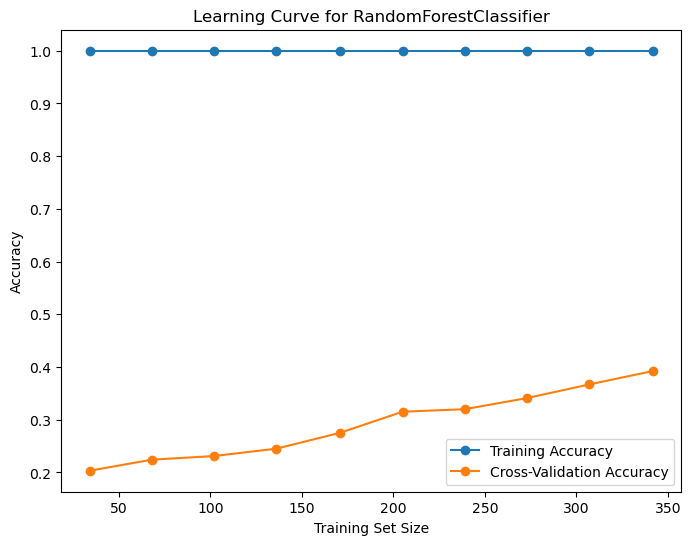

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming rf, X, and y are defined as in your code
# Use cross-validation (e.g., 5-fold)
train_sizes, train_scores, validation_scores = learning_curve(
    rf, X, y, cv=5, scoring='accuracy', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute the mean accuracy scores for training and validation sets across folds
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', label='Cross-Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for RandomForestClassifier')
plt.legend(loc='best')
plt.show()


Is grid search even necessary if the result is no good?

Define the terms for 3 step classification

In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","Wheat D","Wheat I","Wheat S","Oat","AVEFA","ECHCG"]  # example species
dicot_species   = ["PAPRO","POLAV"]
weed_species    = ["AVEFA","PAPRO","POLAV","ECHCG"]  # example of some species labeled as weeds
crop_species    = ["Barley","Wheat D","Wheat I","Wheat S","Oat"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["AVEFA","ECHCG"]
monocot_crop_species = [ "Barley","Wheat D","Wheat I","Wheat S","Oat"]
dicot_weed_species   = ["PAPRO","POLAV"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

print(df[['category1', 'category2']].value_counts())

category1  category2
monocot    crop         239
           weed          96
dicot      weed          93
Name: count, dtype: int64


Level 1: Monocot vs Dicot 

In [36]:
# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y_cat1 = df["category1"]  # Level 1 target
# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)


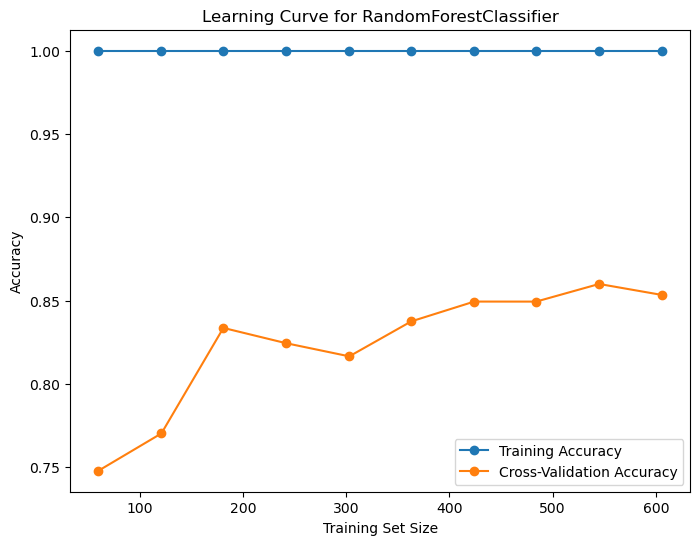

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming rf, X, and y are defined as in your code
# Use cross-validation (e.g., 5-fold)
train_sizes, train_scores, validation_scores = learning_curve(
    clf_cat1, X, y_cat1, cv=5, scoring='accuracy', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute the mean accuracy scores for training and validation sets across folds
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', label='Cross-Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for RandomForestClassifier')
plt.legend(loc='best')
plt.show()

In [12]:
#gridsearch level 1
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# Define a stratified k-fold splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#gridsearch
from sklearn.model_selection import GridSearchCV
# Define a dictionary with the hyperparameters you wish to tune:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat1,param_grid=param_grid,cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_cat1, y_train_cat1)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_cat1)

In [16]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best CV Score: 0.8713981244671782


In [18]:
from sklearn.metrics import classification_report
clf_cat1 = RandomForestClassifier(random_state=42, 
                                  max_depth=10,
                                  min_samples_leaf=2,
                                  min_samples_split=10,
                                  n_estimators=200, bootstrap=False)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)
# Generate and print the classification report
report = classification_report(y_test_cat1, y_pred_cat1)
print(report)

              precision    recall  f1-score   support

       dicot       0.67      0.63      0.65        19
     monocot       0.90      0.91      0.90        67

    accuracy                           0.85        86
   macro avg       0.78      0.77      0.78        86
weighted avg       0.85      0.85      0.85        86



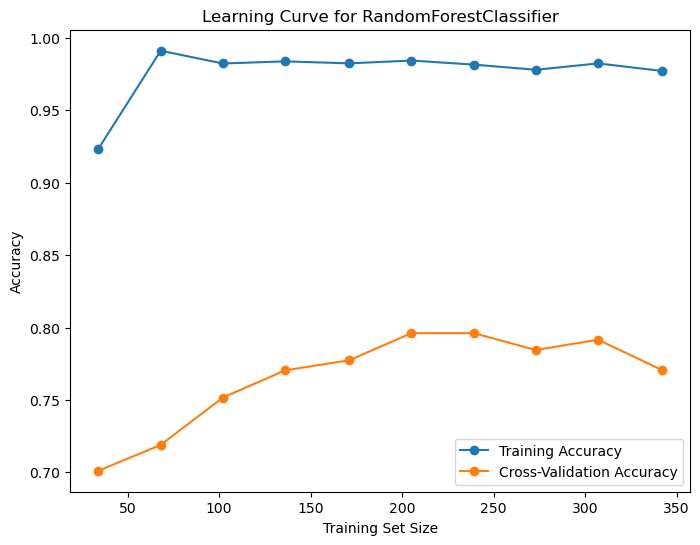

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming rf, X, and y are defined as in your code
# Use cross-validation (e.g., 5-fold)
train_sizes, train_scores, validation_scores = learning_curve(
    clf_cat1, X, y_cat1, cv=5, scoring='accuracy', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute the mean accuracy scores for training and validation sets across folds
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', label='Cross-Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for RandomForestClassifier')
plt.legend(loc='best')
plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_cat1 = clf_cat1.predict(X_test_cat1)
cm = confusion_matrix(y_test_cat1, y_pred_cat1)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_cat1)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df


,dicot,monocot
dicot,63.157895,36.842105
monocot,8.955224,91.044776


In [22]:
# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']


In [24]:
# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

In [27]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat2_monocot,param_grid=param_grid,cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_mono, y_train_mono)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_monocot)

In [29]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8621942697414398


In [26]:
clf_cat2_monocot = RandomForestClassifier(random_state=42, 
                                  max_depth=20,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=200,bootstrap=False)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)
# Generate and print the classification report
report = classification_report(y_test_monocot, y_pred_cat2_monocot)
print(report)

              precision    recall  f1-score   support

        crop       0.96      1.00      0.98        46
        weed       1.00      0.91      0.95        22

    accuracy                           0.97        68
   macro avg       0.98      0.95      0.97        68
weighted avg       0.97      0.97      0.97        68



In [28]:
y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)
cm = confusion_matrix(y_test_monocot, y_pred_cat2_monocot)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_monocot)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

,crop,weed
crop,100.000000,0.000000
weed,9.090909,90.909091


In [30]:
# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)
 
y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)


In [79]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat2_dicot,param_grid=param_grid,cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_di, y_train_di)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_dicot)

In [39]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 1.0


In [32]:
clf_cat2_dicot = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=100, bootstrap=True)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)
# Generate and print the classification report
report = classification_report(y_test_dicot, y_pred_cat2_dicot, zero_division=0)
print(report)

              precision    recall  f1-score   support

        crop       0.00      0.00      0.00         4
        weed       0.78      1.00      0.88        14

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18



In [75]:
y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)
cm = confusion_matrix(y_test_dicot, y_pred_cat2_dicot)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_dicot)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

,crop,weed
crop,0.0,100.0
weed,0.0,100.0


In [35]:
# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model
###dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
###X_dicot_crop = X[dicot_crop_mask]
###y_dicot_crop = df['species'][dicot_crop_mask]

###clf_dicot_crop = RandomForestClassifier(random_state=42)
###clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)

RandomForestClassifier(random_state=42)

In [43]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# Define a stratified k-fold splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# ------------------------------
# Monocot-Weed model
# ------------------------------

mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_mono_weed = RandomForestClassifier(random_state=42)
grid_mono_weed = GridSearchCV(rf_mono_weed, param_grid=param_grid,
                              cv=skf, scoring='accuracy', n_jobs=-1)
grid_mono_weed.fit(X_mono_weed, y_mono_weed)
clf_mono_weed = grid_mono_weed.best_estimator_
print("Monocot-Weed best parameters:", grid_mono_weed.best_params_)

Monocot-Weed best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [46]:
print("Monocot-Weed best parameters:", grid_mono_weed.best_params_)

Monocot-Weed best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [37]:
clf_mono_weed = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=5,
                                  n_estimators=500,bootstrap=True)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=42)

In [54]:
# ------------------------------
# Monocot-Crop model
# ------------------------------
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

param_grid_mono_crop = {
 'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_mono_crop = RandomForestClassifier(random_state=42)
grid_mono_crop = GridSearchCV(rf_mono_crop, param_grid=param_grid_mono_crop,
                              cv=skf, scoring='accuracy', n_jobs=-1)
grid_mono_crop.fit(X_mono_crop, y_mono_crop)
clf_mono_crop = grid_mono_crop.best_estimator_
print("Monocot-Crop best parameters:", grid_mono_crop.best_params_)

Monocot-Crop best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
clf_mono_crop = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=200,bootstrap=True)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

RandomForestClassifier(n_estimators=200, random_state=42)

In [58]:
# ------------------------------
# Dicot-Weed model
# ------------------------------
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

param_grid_dicot_weed = {
 'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_dicot_weed = RandomForestClassifier(random_state=42)
grid_dicot_weed = GridSearchCV(rf_dicot_weed, param_grid=param_grid_dicot_weed,
                               cv=skf, scoring='accuracy', n_jobs=-1)
grid_dicot_weed.fit(X_dicot_weed, y_dicot_weed)
clf_dicot_weed = grid_dicot_weed.best_estimator_
print("Dicot-Weed best parameters:", grid_dicot_weed.best_params_)

Dicot-Weed best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [41]:
clf_dicot_weed = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=500, bootstrap=True)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

RandomForestClassifier(n_estimators=500, random_state=42)

In [43]:
final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

In [45]:
# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df


Final Species-Level Accuracy: 0.8255813953488372


,AVEFA,Barley,ECHCG,Oat,PAPRO,POLAV,Wheat D,Wheat I,Wheat S
AVEFA,77.777778,11.111111,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,11.111111
Barley,0.000000,100.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ECHCG,0.000000,0.000000,75.000000,0.0,12.500000,12.500000,0.000000,0.000000,0.000000
Oat,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000
PAPRO,0.000000,0.000000,36.363636,0.0,63.636364,0.000000,0.000000,0.000000,0.000000
POLAV,0.000000,25.000000,0.000000,0.0,0.000000,62.500000,0.000000,0.000000,12.500000
Wheat D,0.000000,0.000000,0.000000,0.0,5.555556,5.555556,88.888889,0.000000,0.000000
Wheat I,0.000000,0.000000,0.000000,0.0,11.111111,11.111111,0.000000,77.777778,0.000000
Wheat S,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,100.000000
